In [1]:
from preamble import *

ImportError: No module named 'scipy._lib.decorator'

In [3]:
columns =  ['PT', 'AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS',
       'LA', 'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'RP',
       'EM', 'RI', 'OI', 'FU', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU',
       'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS', 'PN',
       'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'D2', 'EA', 'EY', 'PG', 'WC',
       'SC', 'GA', 'UT', 'PM', 'OA', 'HC', 'HP', 'DA']

In [4]:
myfile = "/home/andre/Documentos/SOLAR/WoS/all/savedrecs.txt"
import codecs

doc = codecs.open(myfile,'rU','UTF-16')
df = pd.read_csv(doc,usecols=columns, sep='\t')

#print(set(df.keys()).difference(columns))
df=df.where((pd.notnull(df)), None)

In [5]:
print(df.keys())

Index(['PT', 'AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS',
       'LA', 'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'RP',
       'EM', 'RI', 'OI', 'FU', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU',
       'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS', 'PN',
       'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'D2', 'EA', 'EY', 'PG', 'WC',
       'SC', 'GA', 'UT', 'PM', 'OA', 'HC', 'HP', 'DA'],
      dtype='object')


In [7]:
#df.iloc[0]

In [8]:
df.head()

,PT,AU,BA,BE,...,OA,HC,HP,DA
0,J,"OREGAN, B; GRATZEL, M",None,None,...,None,None,None,2018-05-11
1,J,"NAZEERUDDIN, MK; KAY, A; RODICIO, I; HUMPHRYBA...",None,None,...,None,None,None,2018-05-11
2,J,"Hagfeldt, A; Boschloo, G; Sun, LC; Kloo, L; Pe...",None,None,...,None,Y,N,2018-05-11
3,J,"Kudo, A; Miseki, Y",None,None,...,None,Y,N,2018-05-11
4,J,"Atwater, HA; Polman, A",None,None,...,None,Y,N,2018-05-11


In [9]:
list_di=[]
for i in df["ID"]:
    if not i == None:
        for j in i.split(';'):
            list_di.append(j)

In [14]:
#print(len(list_di))
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

In [21]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          width=800, height=400,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list_di))

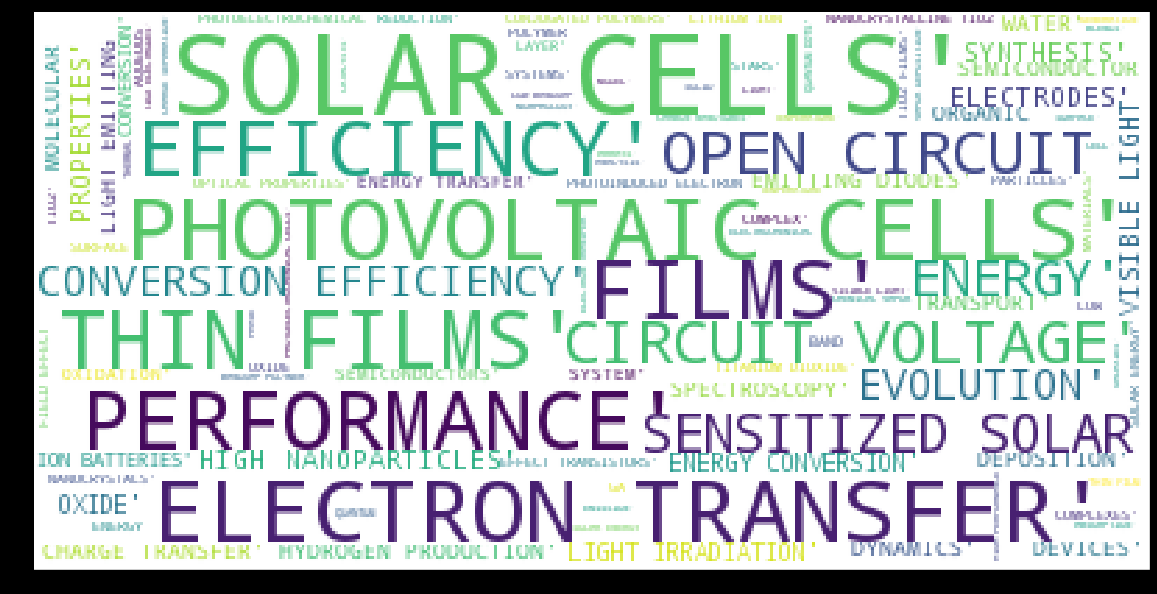

In [28]:
fig = plt.figure(1)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("word1.png", dpi=1800)
plt.show()

In [11]:
temp = df["TI"]
#print(temp)
#temp.plot(kind='bar', xTitle = 'State name', yTitle = "# of incidents", title = 'Top States with highest number of Gun Violence')

In [30]:
df.keys()

Index(['AU', 'TI', 'SO', 'DT', 'LA', 'DE', 'ID', 'AB', 'C1', 'CR', 'PU', 'PY',
       'WC', 'SC'],
      dtype='object')

In [35]:
df.iloc[0]

AU                                                  NaN
TI                                               NATURE
SO                                                  NaN
DT                                                  NaN
LA                                              Article
DE    PHOTOELECTROCHEMICAL CONVERSION; ELECTROCHEMIS...
ID    THE large-scale use of photovoltaic devices fo...
AB    SWISS FED INST TECHNOL, INST PHYS CHEM, CH-101...
C1                                                  NaN
CR                                                   19
PU                                               LONDON
PY                                              3.5e+02
WC                  Science & Technology - Other Topics
SC                                                GL696
Name: J, dtype: object